In [6]:
from Neuroevo import *
import random
import matplotlib.pyplot as plt
import timeit
import pandas as pd

In [2]:
random.seed(213)
np.random.seed(213)

/home/konrad/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/konrad/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

# multimodal

In [7]:
multimodal_train = pd.read_csv('../data/regression/multimodal-large-training.csv')
multimodal_test = pd.read_csv('../data/regression/multimodal-large-test.csv')
multimodal_test_X = multimodal_test[['x']].values
multimodal_test_Y = multimodal_test[['y']].values
multimodal_train_X = multimodal_train[['x']].values
multimodal_train_Y = multimodal_train[['y']].values

epoch 0: 
5037.017204348525
epoch 1: 
4555.683027608936
epoch 2: 
4070.4163168550976
epoch 3: 
3614.4284159174877
epoch 4: 
3299.300396623748
epoch 5: 
3082.4888214513317
epoch 6: 
2893.61802381263
epoch 7: 
2757.7529630564463
epoch 8: 
2651.2204488592265
epoch 9: 
2581.831589123268


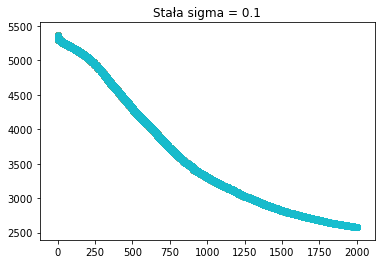

In [48]:
pop_size = 40
p_mut = 0.25
sigma = 0.1
p_cross = 0.5
elite_count = 10
tournament_size = 4
layers_sizes = [5, 5, 1]
layers_activations = ["sigmoid", "sigmoid", "identity"]
p = Population(pop_size, 1, layers_sizes, layers_activations, multimodal_train_X, multimodal_train_Y)
n_epochs = 10
n_iters = 200
loss_history_x = np.array([])
loss_history_y = np.array([])
for epoch in range(n_epochs):
    for i in range(n_iters):
        p.iteration(p_mut, sigma, p_cross, elite_count, tournament_size)
        loss_history_x = np.concatenate((loss_history_x, np.repeat(epoch * n_iters + i, pop_size)))
        loss_history_y = np.concatenate((loss_history_y, np.array(list(map(lambda x: x.eval(), p.individuals)))))
    print("epoch " + str(epoch) + ": ")
    plt.scatter(loss_history_x, loss_history_y, alpha=0.3)
    plt.title("Stała sigma = " + str(sigma))
    print(p.best().eval())

epoch 0: 
2666.850962030422
epoch 1: 
2510.4163867562515
epoch 2: 
2493.3239250303536
epoch 3: 
2481.4150850201263
epoch 4: 
2481.3364013642304
epoch 5: 
2481.307084388019
epoch 6: 
2478.750245079061
epoch 7: 
2478.750245079061
epoch 8: 
2478.750245079061
epoch 9: 
2478.7411470036054


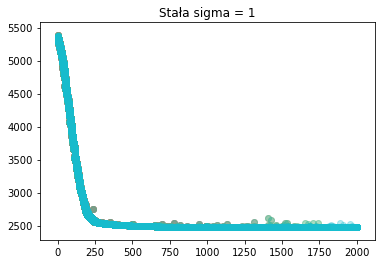

In [49]:
pop_size = 40
p_mut = 0.25
sigma = 1
p_cross = 0.5
elite_count = 10
tournament_size = 4
layers_sizes = [5, 5, 1]
layers_activations = ["sigmoid", "sigmoid", "identity"]
p = Population(pop_size, 1, layers_sizes, layers_activations, multimodal_train_X, multimodal_train_Y)
n_epochs = 10
n_iters = 200
loss_history_x = np.array([])
loss_history_y = np.array([])
for epoch in range(n_epochs):
    for i in range(n_iters):
        p.iteration(p_mut, sigma, p_cross, elite_count, tournament_size)
        loss_history_x = np.concatenate((loss_history_x, np.repeat(epoch * n_iters + i, pop_size)))
        loss_history_y = np.concatenate((loss_history_y, np.array(list(map(lambda x: x.eval(), p.individuals)))))
    print("epoch " + str(epoch) + ": ")
    plt.scatter(loss_history_x, loss_history_y, alpha=0.3)
    plt.title("Stała sigma = " + str(sigma))
    print(p.best().eval())

<ipython-input-122-e46f22873563>:15: RuntimeWarning: divide by zero encountered in double_scalars
  sigma = 20 / np.sqrt(epoch * n_epochs + i)


epoch 0: 
1793.5775591215033
epoch 1: 
1507.889532864471
epoch 2: 
1285.8353126020488
epoch 3: 
1168.01116835884
epoch 4: 
1165.0517851261757
epoch 5: 
1072.429912300799
epoch 6: 
1055.8555618462312
epoch 7: 
1055.8555618462312
epoch 8: 
1055.8555618462312
epoch 9: 
1030.4186057007244


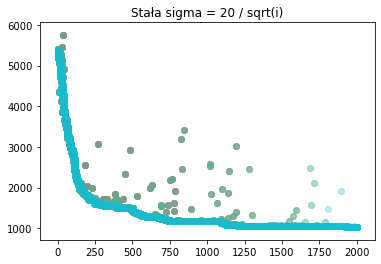

In [122]:
pop_size = 40
p_mut = 0.25
p_cross = 0.5
elite_count = 10
tournament_size = 4
layers_sizes = [5, 5, 1]
layers_activations = ["sigmoid", "sigmoid", "identity"]
p = Population(pop_size, 1, layers_sizes, layers_activations, multimodal_train_X, multimodal_train_Y)
n_epochs = 10
n_iters = 200
loss_history_x = np.array([])
loss_history_y = np.array([])
for epoch in range(n_epochs):
    for i in range(n_iters):
        sigma = 20 / np.sqrt(epoch * n_epochs + i)
        p.iteration(p_mut, sigma, p_cross, elite_count, tournament_size)
        loss_history_x = np.concatenate((loss_history_x, np.repeat(epoch * n_iters + i, pop_size)))
        loss_history_y = np.concatenate((loss_history_y, np.array(list(map(lambda x: x.eval(), p.individuals)))))
    print("epoch " + str(epoch) + ": ")
    plt.scatter(loss_history_x, loss_history_y, alpha=0.3)
    plt.title("Stała sigma = 20 / sqrt(i)")
    print(p.best().eval())

In [124]:
preds = p.best().net.predict(multimodal_train_X)

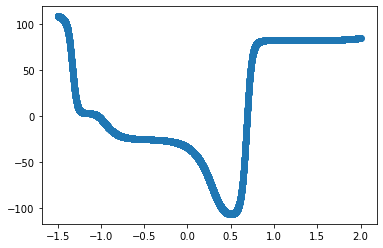

In [125]:
plt.scatter(multimodal_train_X, preds)

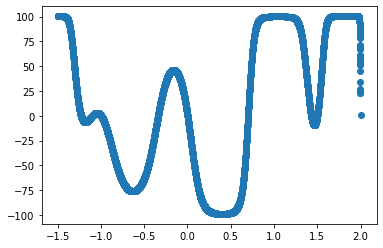

In [127]:
plt.scatter(multimodal_train_X, multimodal_train_Y)

<ipython-input-53-3711e98dd149>:15: RuntimeWarning: divide by zero encountered in double_scalars
  sigma = 20 / np.sqrt(epoch * n_epochs + i)


epoch 0: 
1555.522094779034
epoch 1: 
1495.5302848809306
epoch 2: 
1457.0418810861765
epoch 3: 
1451.183749726752
epoch 4: 
1450.0536975300488
epoch 5: 
1448.685023398024
epoch 6: 
1448.685023398024
epoch 7: 
1448.685023398024
epoch 8: 
1448.685023398024
epoch 9: 
1440.4265329439113


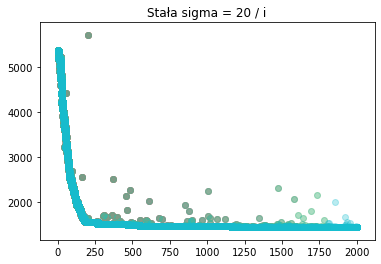

In [53]:
pop_size = 40
p_mut = 0.25
p_cross = 0.5
elite_count = 10
tournament_size = 4
layers_sizes = [5, 5, 1]
layers_activations = ["sigmoid", "sigmoid", "identity"]
p = Population(pop_size, 1, layers_sizes, layers_activations, multimodal_train_X, multimodal_train_Y)
n_epochs = 10
n_iters = 200
loss_history_x = np.array([])
loss_history_y = np.array([])
for epoch in range(n_epochs):
    for i in range(n_iters):
        sigma = 20 / np.sqrt(epoch * n_epochs + i)
        p.iteration(p_mut, sigma, p_cross, elite_count, tournament_size)
        loss_history_x = np.concatenate((loss_history_x, np.repeat(epoch * n_iters + i, pop_size)))
        loss_history_y = np.concatenate((loss_history_y, np.array(list(map(lambda x: x.eval(), p.individuals)))))
    print("epoch " + str(epoch) + ": ")
    plt.scatter(loss_history_x, loss_history_y, alpha=0.3)
    plt.title("Stała sigma = 20 / i")
    print(p.best().eval())

# iris

In [129]:
iris = pd.read_csv("../data/iris.data", header = None)
dummies = pd.get_dummies(iris[4])
iris = iris.drop(columns=4).join(dummies)
iris
y = iris[0].values
y = y.reshape((len(y), 1))
x = iris.drop(columns=0).values

epoch 0: 
0.17484348944544265
epoch 1: 
0.1409002000285593
epoch 2: 
0.11722972325034169
epoch 3: 
0.0954502492452798
epoch 4: 
0.0954502492452798
epoch 5: 
0.0954502492452798
epoch 6: 
0.0954502492452798
epoch 7: 
0.0954502492452798
epoch 8: 
0.0954502492452798
epoch 9: 
0.0954502492452798


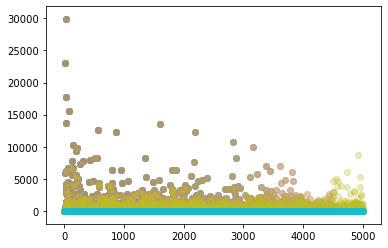

In [130]:
pop_size = 200
p_mut = 0.4
p_cross = 0.8
elite_count = 20
tournament_size = 4
layers_sizes = [50, 50, 50, 1]
layers_activations = ["ReLU", "ReLU", "ReLU", "identity"]
p = Population(pop_size, np.shape(x)[1], layers_sizes, layers_activations, x, y)
n_epochs = 10
n_iters = 500
loss_history_x = np.array([])
loss_history_y = np.array([])
for epoch in range(n_epochs):
    for i in range(n_iters):
        sigma = 10/np.log(epoch * n_iters + i + 2)
        p.iteration(p_mut, sigma, p_cross, elite_count, tournament_size)
        loss_history_x = np.concatenate((loss_history_x, np.repeat(epoch * n_iters + i, pop_size)))
        loss_history_y = np.concatenate((loss_history_y, np.array(list(map(lambda x: x.eval(), p.individuals)))))
    print("epoch " + str(epoch) + ": ")
    plt.scatter(loss_history_x, loss_history_y, alpha=0.3)
    print(p.best().eval())

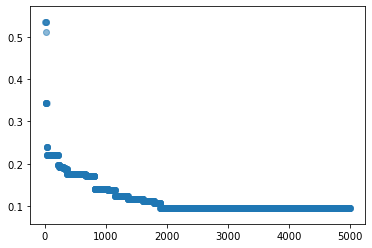

In [131]:
plt.scatter(loss_history_x[pop_size*10::pop_size], loss_history_y[pop_size*10::pop_size], alpha=0.3)

# auto-mpg

In [68]:
widths = [7, 4, 10, 10, 11, 7, 4, 4, 30]
df = pd.read_fwf("../data/auto-mpg.data", widths=widths, header=None, na_values=['?'])
df = df.dropna()
#dummies = pd.get_dummies(df[8])
df = df.drop(columns=[7,8])#.join(dummies)
y = df[0].values
y = y.reshape((len(y), 1))
x = df.drop(columns=0).values

In [69]:
df

,0,1,2,3,4,5,6
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


In [75]:
np.shape(x), np.shape(y), np.shape(x)[1]

((392, 6), (392, 1), 6)

In [71]:
np.shape(multimodal_test_X), np.shape(multimodal_test_Y)

((1000, 1), (1000, 1))

epoch 0: 
28.39525700248645
epoch 1: 
25.868917603085443
epoch 2: 
25.49387561786275
epoch 3: 
25.49387561786275
epoch 4: 
25.15074724411366
epoch 5: 
25.03725929988653
epoch 6: 
22.024699485976015
epoch 7: 
21.833839592505914
epoch 8: 
21.77705379088723
epoch 9: 
21.7681005790676


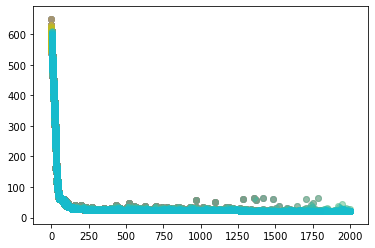

In [81]:
pop_size = 100
p_mut = 0.4
p_cross = 0.8
elite_count = 10
tournament_size = 4
layers_sizes = [25, 25, 25, 5, 1]
sigma = 0.1
layers_activations = ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "identity"]
p = Population(pop_size, np.shape(x)[1], layers_sizes, layers_activations, x, y)
n_epochs = 10
n_iters = 200
loss_history_x = np.array([])
loss_history_y = np.array([])
for epoch in range(n_epochs):
    for i in range(n_iters):
        p.iteration(p_mut, sigma, p_cross, elite_count, tournament_size)
        loss_history_x = np.concatenate((loss_history_x, np.repeat(epoch * n_iters + i, pop_size)))
        loss_history_y = np.concatenate((loss_history_y, np.array(list(map(lambda x: x.eval(), p.individuals)))))
    print("epoch " + str(epoch) + ": ")
    #plt.scatter(loss_history_x, loss_history_y, alpha=0.3)
    plt.scatter(loss_history_x[100:], loss_history_y[100:], alpha=0.3)
    print(p.best().eval())

epoch 0: 
0.19337424549768437


KeyboardInterrupt: 

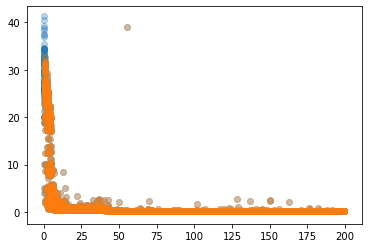

In [128]:
pop_size = 100
p_mut = 0.4
p_cross = 0.8
elite_count = 10
tournament_size = 4
layers_sizes = [25, 25, 25, 5, 1]
#sigma = 0.5
layers_activations = ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "identity"]
p = Population(pop_size, np.shape(x)[1], layers_sizes, layers_activations, x, y)
n_epochs = 10
n_iters = 200
loss_history_x = np.array([])
loss_history_y = np.array([])
for epoch in range(n_epochs):
    for i in range(n_iters):
        sigma = 10/np.log(epoch * n_iters + i + 2)
        p.iteration(p_mut, sigma, p_cross, elite_count, tournament_size)
        loss_history_x = np.concatenate((loss_history_x, np.repeat(epoch * n_iters + i, pop_size)))
        loss_history_y = np.concatenate((loss_history_y, np.array(list(map(lambda x: x.eval(), p.individuals)))))
    print("epoch " + str(epoch) + ": ")
    plt.scatter(loss_history_x, loss_history_y, alpha=0.3)
    plt.scatter(loss_history_x[100:], loss_history_y[100:], alpha=0.3)
    print(p.best().eval())

epoch 0: 
51.79868225715654
epoch 1: 
51.79868225715654
epoch 2: 
51.79868225715654
epoch 3: 
47.06676417837282
epoch 4: 
47.06676417837282
epoch 5: 
47.06676417837282
epoch 6: 
47.06676417837282
epoch 7: 
22.506998661304593
epoch 8: 
20.573466919971743
epoch 9: 
20.405799082645782


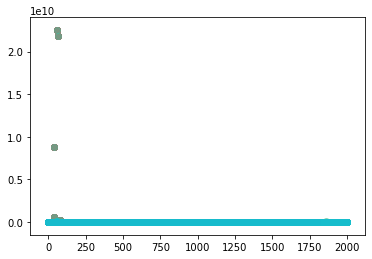

In [87]:
pop_size = 100
p_mut = 0.4
p_cross = 0.8
elite_count = 10
tournament_size = 4
layers_sizes = [25, 25, 25, 5, 1]
#sigma = 0.5
layers_activations = ["ReLU", "ReLU", "ReLU", "ReLU", "identity"]
p = Population(pop_size, np.shape(x)[1], layers_sizes, layers_activations, x, y)
n_epochs = 10
n_iters = 200
loss_history_x = np.array([])
loss_history_y = np.array([])
for epoch in range(n_epochs):
    for i in range(n_iters):
        sigma = 10/np.log(epoch * n_iters + i + 2)
        p.iteration(p_mut, sigma, p_cross, elite_count, tournament_size)
        loss_history_x = np.concatenate((loss_history_x, np.repeat(epoch * n_iters + i, pop_size)))
        loss_history_y = np.concatenate((loss_history_y, np.array(list(map(lambda x: x.eval(), p.individuals)))))
    print("epoch " + str(epoch) + ": ")
    plt.scatter(loss_history_x, loss_history_y, alpha=0.3)
    plt.scatter(loss_history_x[200:], loss_history_y[200:], alpha=0.3)
    print(p.best().eval())

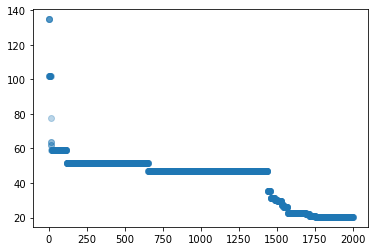

In [101]:
plt.scatter(loss_history_x[::100], loss_history_y[::100], alpha=0.3)

In [95]:
loss_history_y

array([134.81230665, 165.92018029, 195.93900807, ...,  20.40761647,
        20.40579908,  20.40761647])